<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1">Problem</a></span></li><li><span><a href="#Data-Info" data-toc-modified-id="Data-Info-2">Data Info</a></span></li><li><span><a href="#1-Get-data" data-toc-modified-id="1-Get-data-3">1 Get data</a></span><ul class="toc-item"><li><span><a href="#1.1-Basic-data-transformations" data-toc-modified-id="1.1-Basic-data-transformations-3.1">1.1 Basic data transformations</a></span></li></ul></li><li><span><a href="#2-EDA" data-toc-modified-id="2-EDA-4">2 EDA</a></span><ul class="toc-item"><li><span><a href="#2.1-Numerical-column" data-toc-modified-id="2.1-Numerical-column-4.1">2.1 Numerical column</a></span><ul class="toc-item"><li><span><a href="#2.1.1-REF" data-toc-modified-id="2.1.1-REF-4.1.1">2.1.1 REF</a></span></li><li><span><a href="#2.1.2-Review" data-toc-modified-id="2.1.2-Review-4.1.2">2.1.2 Review</a></span></li><li><span><a href="#2.1.3-Cocoa-Percent" data-toc-modified-id="2.1.3-Cocoa-Percent-4.1.3">2.1.3 Cocoa Percent</a></span></li><li><span><a href="#2.1.4.-Correlation-matrix-(numeric-features)" data-toc-modified-id="2.1.4.-Correlation-matrix-(numeric-features)-4.1.4">2.1.4. Correlation matrix (numeric features)</a></span></li></ul></li><li><span><a href="#2.2-Categorical-features" data-toc-modified-id="2.2-Categorical-features-4.2">2.2 Categorical features</a></span></li></ul></li><li><span><a href="#3-Outliers" data-toc-modified-id="3-Outliers-5">3 Outliers</a></span></li><li><span><a href="#4-Data-Preprocessing" data-toc-modified-id="4-Data-Preprocessing-6">4 Data Preprocessing</a></span></li><li><span><a href="#5-Feature-Engineering" data-toc-modified-id="5-Feature-Engineering-7">5 Feature Engineering</a></span></li><li><span><a href="#6-Feature-selection" data-toc-modified-id="6-Feature-selection-8">6 Feature selection</a></span><ul class="toc-item"><li><span><a href="#6.1-Numeric-features-correlation" data-toc-modified-id="6.1-Numeric-features-correlation-8.1">6.1 Numeric features correlation</a></span></li><li><span><a href="#6.2-Categorical-features-correlation" data-toc-modified-id="6.2-Categorical-features-correlation-8.2">6.2 Categorical features correlation</a></span></li></ul></li><li><span><a href="#7-Models" data-toc-modified-id="7-Models-9">7 Models</a></span><ul class="toc-item"><li><span><a href="#7.1-CatBoost-with-defaul-hyperparameters" data-toc-modified-id="7.1-CatBoost-with-defaul-hyperparameters-9.1">7.1 CatBoost with defaul hyperparameters</a></span></li><li><span><a href="#7.2-Hyperparameters-tunning" data-toc-modified-id="7.2-Hyperparameters-tunning-9.2">7.2 Hyperparameters tunning</a></span></li><li><span><a href="#7.3-Make-predictions-with-models" data-toc-modified-id="7.3-Make-predictions-with-models-9.3">7.3 Make predictions with models</a></span></li></ul></li><li><span><a href="#8-Pipelines" data-toc-modified-id="8-Pipelines-10">8 Pipelines</a></span><ul class="toc-item"><li><span><a href="#8.1-Data-preprocessing-class" data-toc-modified-id="8.1-Data-preprocessing-class-10.1">8.1 Data preprocessing class</a></span></li><li><span><a href="#8.2-Feature-engineering-class" data-toc-modified-id="8.2-Feature-engineering-class-10.2">8.2 Feature engineering class</a></span></li><li><span><a href="#8.3-FeatureFixer-class" data-toc-modified-id="8.3-FeatureFixer-class-10.3">8.3 FeatureFixer class</a></span></li></ul></li><li><span><a href="#9-Stacking" data-toc-modified-id="9-Stacking-11">9 Stacking</a></span><ul class="toc-item"><li><span><a href="#9.1-Stacking-from-SKLearn" data-toc-modified-id="9.1-Stacking-from-SKLearn-11.1">9.1 Stacking from SKLearn</a></span></li><li><span><a href="#8.1-Stacking-pipeline" data-toc-modified-id="8.1-Stacking-pipeline-11.2">8.1 Stacking pipeline</a></span></li><li><span><a href="#Linear" data-toc-modified-id="Linear-11.3">Linear</a></span></li><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-11.4">Decision tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-11.5">Random forest</a></span></li></ul></li><li><span><a href="#9-Make-predictions" data-toc-modified-id="9-Make-predictions-12">9 Make predictions</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 15,
        'axes.labelsize': 15,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'font.size': 15,
        'figure.figsize': (9, 5),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })


from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import optuna
#optuna.logging.set_verbosity(optuna.logging.WARNING)
optuna.logging.set_verbosity(optuna.logging.INFO)

import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/competitions/practical-ml-chocolate/data
# https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/

In [2]:
!git branch

  main
* models


# Problem

В данном ноутбуке решается задача регрессии, предсказания рейтинга шоколада на основании данных о нём. Большинство предикторов являются категориальными и лишь несколько численными, поэтому в качестве библиотеки для построения модели был выбран регрессор CatBoost. Кроме того, в двух категориальных колонках присутсвует множество пропусков, заполнение которых наиболее вероятным заначением может негативно повлиять на качество модели. Решению данной задачи было уделено внимание.

# Data Info

* Company - компания производитель
* Specific Bean Origin - географический регион происхождения
* REF - параметр, определяющий момент внесения записи в базу данных (чем выше значение, тем "свежее" запись)
* Review - дата публикации отзыва
* Cocoa Percent - процентное содержания какао
* Company Location - страна производитель
* Rating - экспертный рейтинг
* Bean Type - используемый сорт какао-бобов, если таковой имеется
* Broad Bean Origin - географический регион происхождения какао-бобов

# 1 Get data

In [3]:
df_train = pd.read_csv('data_intial/chocolate_train.csv')
df_test = pd.read_csv('data_intial/chocolate_test_new.csv')
df_train.head()

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72%,U.S.A.,3.00,Trinitario,Dominican Republic
4,Pralus,"Java, Indonesie",32,2006,75%,France,3.50,Criollo,Indonesia


In [4]:
print(f'Train data has {df_train.shape[1]} columns and {df_train.shape[0]} rows')
print(f'Test data has {df_test.shape[1]} columns and {df_test.shape[0]} rows')

Train data has 9 columns and 1255 rows
Test data has 8 columns and 540 rows


## 1.1 Basic data transformations

In [5]:
empty_cell = '\xa0'

print('Train', 50*'-', sep='\n', end='\n')
for col in df_train.columns[df_train.isna().sum() > 0]:
    print(f"'{col}' has {df_train[col].isna().sum()} NaNs and {df_train[col].apply(lambda x: x == empty_cell).sum()} empty cells")
    
print(50*'-')
print('Test', 50*'-', sep='\n', end='\n')
for col in df_test.columns[(df_test == empty_cell).sum() > 0]:
    print(f"'{col}' has {df_test[col].isna().sum()} NaNs and {df_test[col].apply(lambda x: x == empty_cell).sum()} empty cells")

Train
--------------------------------------------------
'Bean Type' has 1 NaNs and 628 empty cells
'Broad Bean Origin' has 1 NaNs and 55 empty cells
--------------------------------------------------
Test
--------------------------------------------------
'Bean Type' has 0 NaNs and 259 empty cells
'Broad Bean Origin' has 0 NaNs and 18 empty cells


Как видим, в данных есть пропуски, и это не только NaN, но и пустые ячейки. Заменим все эти пропуски уникальным значением "Unknown". Вдальнейшем у нас будет выбор: оставить как есть или использовать модели машинного обучения для заполнения этих пропусков. Я не заменяю пустые ячейки наиболее вероятными значениями, так как в процессе анализа качества моделей было выявлено, что такое решение является наихудшим.

Кроме того, проведём простейшее преобразование признака "Cocoa Percent". Он является числовым, но записан как строка, нужно это исправить. Также в названиях стран присутствуют грамматические ошибки, исправим и их.

In [6]:
def preprocessing_step1(data: pd.DataFrame) -> pd.DataFrame:
    data_new = data.copy()
    data_new['Cocoa Percent'] = data_new['Cocoa Percent'].apply(lambda x: float(x.strip('%')))
    data_new = data_new.fillna("Unknown")
    data_new['Broad Bean Origin'] = data_new['Broad Bean Origin'].replace('\xa0', "Unknown")
    data_new['Bean Type'] = data_new['Bean Type'].replace('\xa0', "Unknown")
    data_new.replace(
    {
        'Eucador': 'Ecuador',
        'Domincan Republic': 'Dominican Republic',
        'Niacragua': 'Nicaragua'
    },
    inplace=True)
    return data_new

In [7]:
df_train = preprocessing_step1(df_train)
df_test = preprocessing_step1(df_test)

# 2 EDA

In [9]:
print(f"There are {len(df_train.dtypes[df_train.dtypes == object])} categorical columns", 32*'-', sep='\n')
for col in df_train.columns[df_train.dtypes == object]:
    print(col)
print(32*'-')

print(f"And {len(df_train.dtypes[(df_train.dtypes == int) | (df_train.dtypes == float)])} numerical columns (one of which is target as we are looking on train data)",
      32*'-', sep='\n')
for col in df_train.columns[(df_train.dtypes == int) | (df_train.dtypes == float)]:
    if col == 'Rating':
        print(f"{col} (target)")
    else:
        print(col)
print(32*'-')

There are 5 categorical columns
--------------------------------
Company
Specific Bean Origin
Company Location
Bean Type
Broad Bean Origin
--------------------------------
And 4 numerical columns (one of which is target as we are looking on train data)
--------------------------------
REF
Review
Cocoa Percent
Rating (target)
--------------------------------


## 2.1 Numerical column

Рассмотрим числовые предикторы. Мы будем искать признаки линейной зависмсоти между числовыми предикторами и целевой переменной (также числовой), используя средние значения 'Rating' в бинах по нашим признакам. Также посмотрим на корреляцию Пирсона, которая соответствует степени линейной зависимости между признаками или признаком и целевой переменной.

### 2.1.1 REF

In [10]:
def distribution(data: pd.DataFrame, title: str, x_label: str, y_label:str, figsize: tuple=(9,5)):
    plt.figure(figsize=figsize)
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Посмотрим на зависимость среднего 'Rating' от 'REF'

In [13]:
def mean_rating_in_bins(data: pd.DataFrame, col: str, bin_edges: list):
    bin_values = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])]['Rating'].mean()
        for i in range(len(bin_edges) - 1)
    ]
    return bin_values

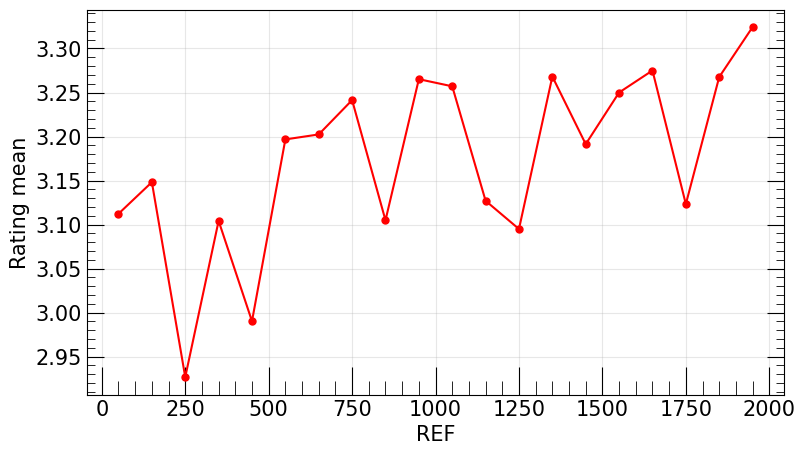

In [14]:
REF_bins = np.arange(0, 2100, 100)
REF_bin_centers = [(REF_bins[i+1] + REF_bins[i]) / 2 for i in range(REF_bins.shape[0]-1)]

plt.figure(figsize=(9, 5))
plt.plot(REF_bin_centers, mean_rating_in_bins(df_train, 'REF', REF_bins), 'o-r')
plt.xlabel('REF')
plt.ylabel('Rating mean')
plt.show()

На графике наблюдается что-то отдалённо напоминающее линейную зависимость Rating от REF.<br>
Также между ними существует небольшая корреляция.

In [15]:
df_train[['REF', 'Rating']].corr()

,REF,Rating
REF,1.000000,0.112792
Rating,0.112792,1.000000


### 2.1.2 Review

Мы видим, что предикторы 'REF' и 'Review' практически линейно зависимы. Этого стоило ожидать. В следующих шагах мы исключим один из этих предикторов для снижения мультиколлинеарности

In [16]:
df_train[['REF', 'Review', 'Rating']].corr()

,REF,Review,Rating
REF,1.000000,0.984938,0.112792
Review,0.984938,1.000000,0.111826
Rating,0.112792,0.111826,1.000000


### 2.1.3 Cocoa Percent

Cocoa Percent имеет распределение близкое к нормальному, стандартное отклонение не очень велико.

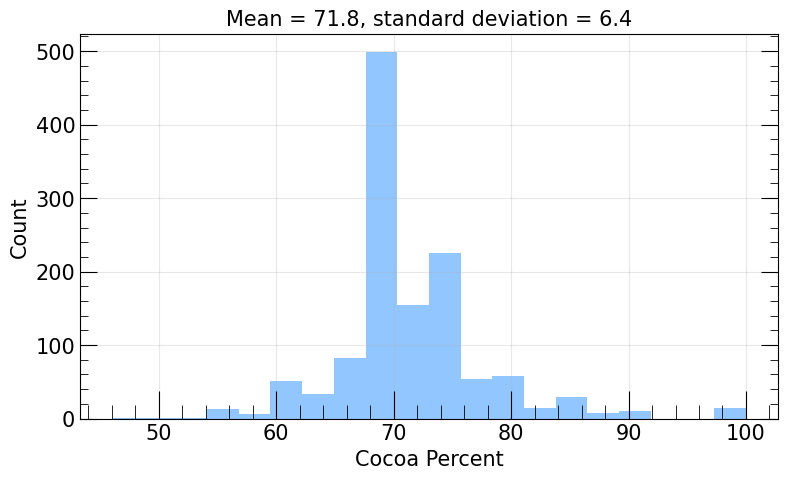

In [17]:
plt.hist(df_train['Cocoa Percent'], bins=20)
plt.title(f"Mean = {round(df_train['Cocoa Percent'].mean(), 1)}, standard deviation = {round(df_train['Cocoa Percent'].std(), 2)}")
plt.xlabel('Cocoa Percent')
plt.ylabel('Count')
plt.show()

На графике наблюдается нечто похожее на линейную зависимость. Шоколад с бОльшим процентом содержания какао в среднем имеет более низкий рейтинг.

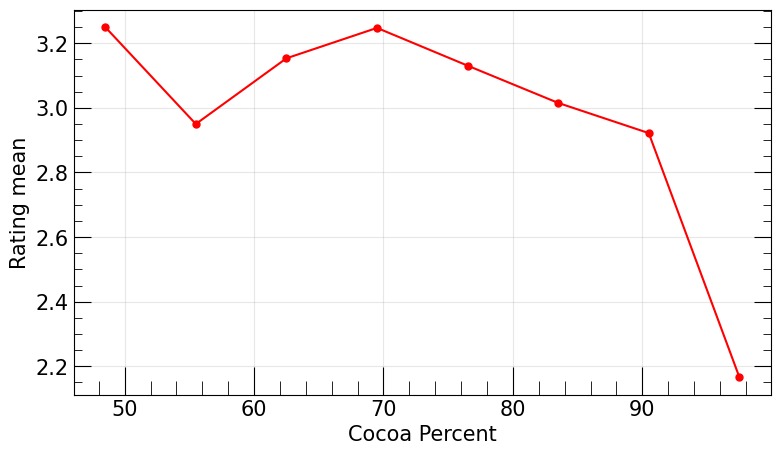

In [21]:
CocoaPercent_bins = np.arange(45, 105, 7)
CocoaPercent_bin_centers = [(CocoaPercent_bins[i+1] + CocoaPercent_bins[i]) / 2 for i in range(CocoaPercent_bins.shape[0]-1)]

plt.plot(CocoaPercent_bin_centers,
         mean_rating_in_bins(df_train, 'Cocoa Percent', CocoaPercent_bins),
         'o-r')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating mean')
plt.show()

In [22]:
df_train[['Cocoa Percent', 'Rating']].corr()

,Cocoa Percent,Rating
Cocoa Percent,1.000000,-0.172411
Rating,-0.172411,1.000000


### 2.1.4. Correlation matrix (numeric features)

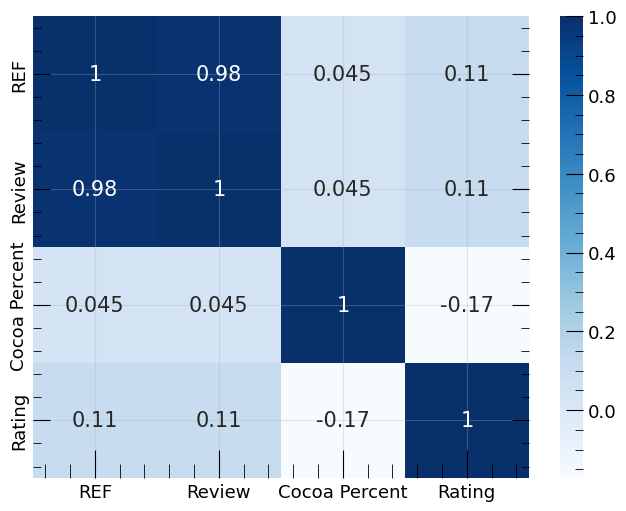

In [23]:
plt.figure(figsize = (8,6))
plt.rcParams.update({
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
})
sns.heatmap(df_train.corr(), annot=True, cmap="Blues")

plt.show()

Подводя итоги анализа численных предикторов, можно сказать:
* Один из двух сильно скоррелированных предикторов "REF" и "Review" нужно исключить
* Предикторы скоррелированы (хоть и не сильно) с целевой переменной "Rating" и могут иметь предсказательную силу. Вдальнейшем они вряд ли будут отброшены

## 2.2 Categorical features

В этой части мы не будем подробно изучать категориальные признаки, лишь посмотрим на количество категорий и корреляцию их друг с другом. Более подробный анализ будет предствален в главе, посвященной разработке новых предикторов на их основе (Feature Engineering)

In [24]:
print("Number of unique values", 30*"-", sep='\n')

for col in df_train.columns[df_train.dtypes == object]:
    print(f"{col}: {df_train[col].nunique()}")

Number of unique values
------------------------------
Company: 376
Specific Bean Origin: 762
Company Location: 56
Bean Type: 38
Broad Bean Origin: 83


In [25]:
import association_metrics as am

XC = df_train.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(XC)
cramersv.fit()

,Company,Specific Bean Origin,Company Location,Bean Type,Broad Bean Origin
Company,1.000000,0.771074,0.999638,0.616841,0.603562
Specific Bean Origin,0.771074,1.000000,0.811367,0.907956,0.985204
Company Location,0.999638,0.811367,1.000000,0.241511,0.389432
Bean Type,0.616841,0.907956,0.241511,1.000000,0.388054
Broad Bean Origin,0.603562,0.985204,0.389432,0.388054,1.000000


Сильно скоррелированные признаки:
* Company и Company Location
* Broad Bean Origin и Specific Bean Origin
* Bean Type и Specific Bean Origin

Возморжно, часть из этих признаков будет отброшена вдальнейшем, однако пока они нужны нам для построения новых признаков.

# 3 Outliers

Посмотрим на выбросы в данных лишь ради интереса. Практика показала, что исключение объектов из тренировочных данных не приводит улучшению качества моделей. Также посмотрим на распределение целевой переменной.

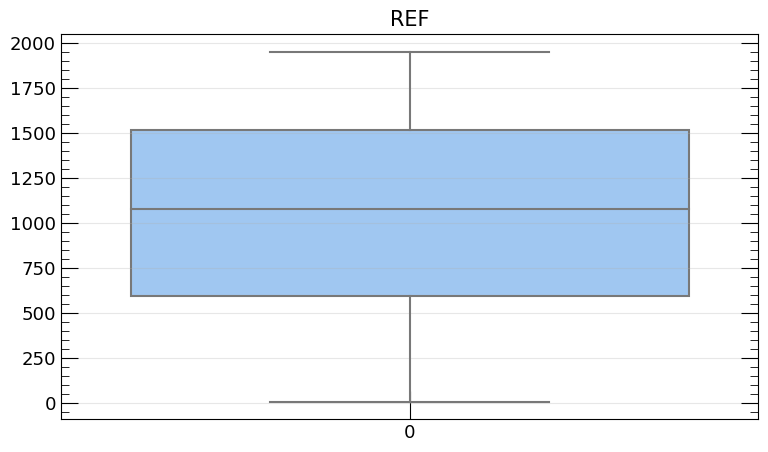

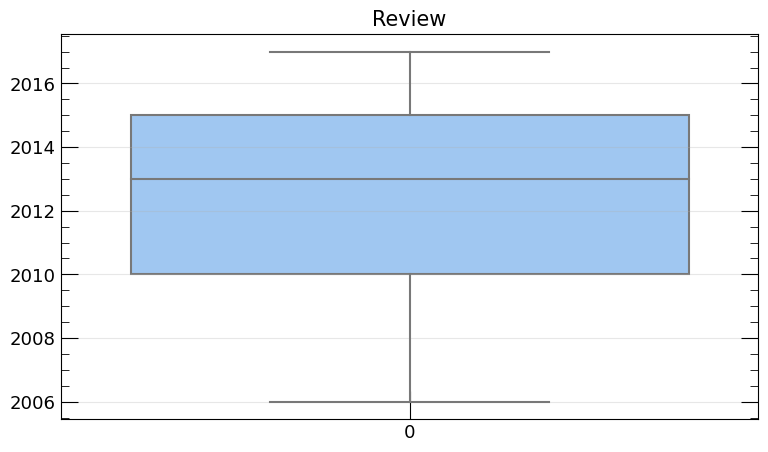

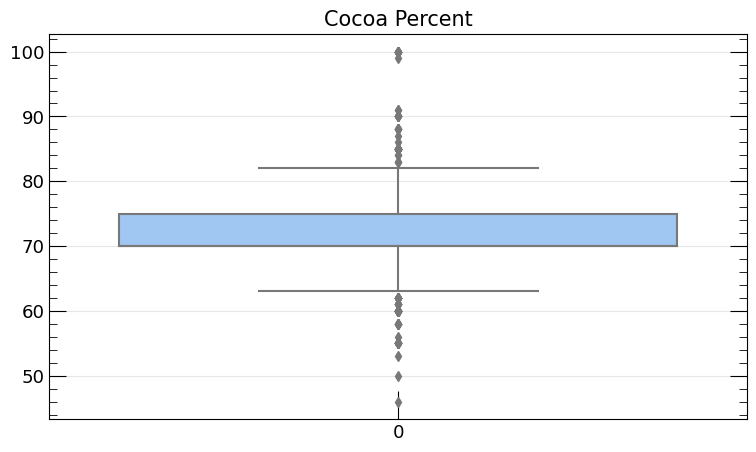

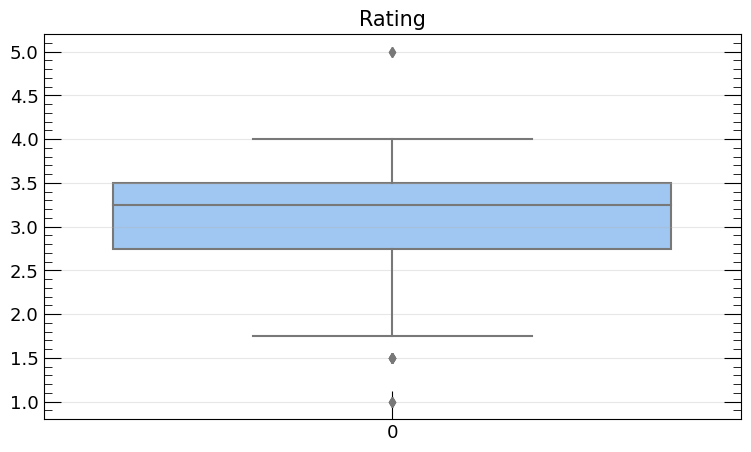

In [26]:
cat_cols = df_train.columns[df_train.dtypes == 'object']
num_cols = df_train.columns[df_train.dtypes != 'object']

for col in num_cols:
    sns.boxplot(df_train[col])
    plt.title(col)
    plt.show()

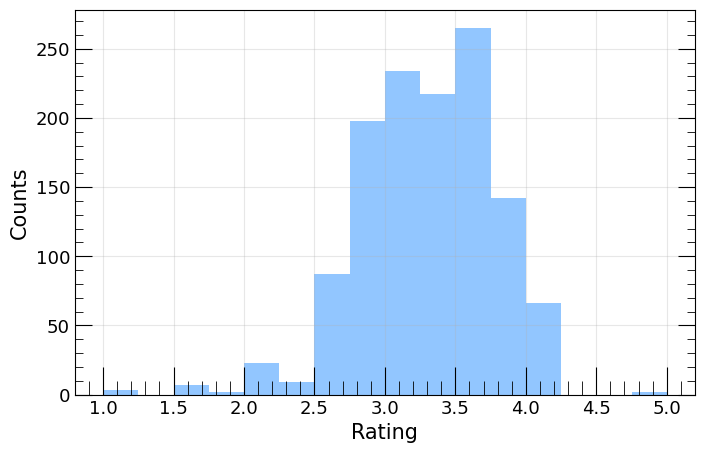

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(df_train['Rating'], bins=16)
plt.xlabel('Rating')
plt.ylabel("Counts")
plt.show()

Выводы:
* Целевая переменная 'Rating' имеет точки, которые можно интерпретировать как выбросы, однако мы не будем удалять их
* Переменная 'Cocoa Percent', как мы видели выше, имеет очень узкое распределение, поэтому много точек потенциально могут быть интерпретированы как выбросы, но объекты с такими параметрами мы также не будем исключать из тренировочной выборки

# 4 Data Preprocessing

Теперь попробуем заполнить пропуски в колонках "Bean Type" и "Broad Bean Origin" с помощью классификатороа CatBoost. Потенциально это может улучшить качество конечной модели.

Хоть перемешивать тренировочные данные с тестовыми и тренировать на них некий трансформатор и неправильно, именно этим мы и будем заниматься. Здесь мы лишь тестируем метод для заполнения пропусков. В главе 8 (Pipelines) класс FeatureFixer, заполняющий пропуски, будет переопределён, чтобы обучаться только на тренировочных данных и тогда будет работать как надо.

В целом несколько ячеек ниже можно пропустить, так как позже будет дано более корректное определение класса для заполнения пропусков.

In [28]:
optuna.logging.set_verbosity(optuna.logging.INFO)

In [31]:
class FeatureFixer:
    
    """
    column - признак, который мы будем прогнозировать ('Broad Bean Origin' или 'Bean Type')
    train - тренировочный набор данных
    test - тестовый набор данных
    """
    def __init__(self, column: str, train: pd.DataFrame, test: pd.DataFrame):
        self.train_init = train
        self.test_init = test
        self.column = column
        

    @staticmethod
    def label_accuracy(y_true: pd.Series, y_pred: np.ndarray):
        """Простая метрика для оценки качества модели"""
        df_pred = pd.DataFrame({'True values': y_true.values, 'Predicted values': y_pred[:, 0]})
        return (df_pred['True values'] == df_pred['Predicted values']).sum() / df_pred.shape[0]
    
    
    def resplit(self, cols_to_drop: list, n_top: int):
        """
        Переразбивает изначальные train и test для работы над прогнозированием колонки
        cols_to_drop - признаки, от кооторых нужно избавиться. Это 'Rating' и тот признак, который мы ещё не спрогнозировали
        """
        # from initial train
        # train
        train_col_from_train = self.train_init[(self.train_init[self.column] != 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        # test
        test_col_from_train = self.train_init[(self.train_init[self.column] == 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        
        # from initial test
        # train
        cols_to_drop.remove('Rating')
        train_col_from_test = self.test_init[(self.test_init[self.column] != 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        # test
        test_col_from_test = self.test_init[(self.test_init[self.column] == 'Unknown')]\
            .drop(cols_to_drop, axis=1)
        
        # train
        self.X = pd.concat([
            train_col_from_train.drop(self.column, axis=1),
            train_col_from_test.drop(self.column, axis=1)
        ])

        self.y = pd.concat([
            train_col_from_train[self.column],
            train_col_from_test[self.column]
        ])
        
        # test ("Unknown" parts of datasets)
        self.X_test_from_train = test_col_from_train.drop([self.column], axis=1)
        self.X_test_from_test = test_col_from_test.drop([self.column], axis=1)
        
        # Most probable bean origins
        top_values = self.y.value_counts()[:n_top].index
        top_values_mask = self.y.apply(lambda x: x in top_values)

        # train on top n values of column only
        self.X = self.X[top_values_mask]
        self.y = self.y[top_values_mask]

        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X, self.y, test_size=0.2)
        self.categorical_features_indices = np.where(self.X.dtypes == object)[0]
        
        
    def hyperparameters_tunning(self, n_trials: int):
        """Подбор гиперпараметров модели"""
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, step=0.001)
            }

            estimator = CatBoostClassifier(**param,
                                           cat_features=self.categorical_features_indices,
                                           verbose=False)

            estimator.fit(self.X_train, self.y_train)
            pred = estimator.predict(self.X_val)

            return self.label_accuracy(self.y_val, pred)

        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=n_trials, n_jobs=-1)
        #print(study.best_trial)
        
        
        self.best_params = study.best_params
        self.model = CatBoostClassifier(**study.best_params,
                                       cat_features=self.categorical_features_indices,
                                       logging_level='Silent')
        
        self.model.fit(self.X_train, self.y_train)
        y_pred = self.model.predict(self.X_val)
        
        print(f"Best accuracy = {self.label_accuracy(self.y_val, y_pred)}")
        
        self.df_importance = pd.DataFrame({'Feature': self.model.feature_names_,
                                           'CatBoost Importance': self.model.feature_importances_})\
                                           .sort_values(by='CatBoost Importance', ascending=False)
        display(self.df_importance)
        
        
    def fit(self):
        self.model.fit(self.X, self.y)
        
        
    def predict(self):
        pred_train = self.model.predict(self.X_test_from_train)
        pred_test = self.model.predict(self.X_test_from_test)
        
        # Indices of rows with "Unknown" value from intiinal datasets
        index_train = self.train_init[(self.train_init[self.column] == 'Unknown')].index
        index_test = self.test_init[(self.test_init[self.column] == 'Unknown')].index
        
        train_output = self.train_init.copy()
        test_output = self.test_init.copy()
        
        # Replace values in chosen column with model output
        train_output.loc[index_train, [self.column]] = pred_train[:, 0]
        test_output.loc[index_test, [self.column]] = pred_test[:, 0]
        
        return train_output, test_output
    

In [26]:
# class to impute Broad Bean Origin
fixer_bbo = FeatureFixer('Broad Bean Origin', df_train, df_test)
fixer_bbo.resplit(cols_to_drop=['Bean Type', 'Rating'], n_top=11)
fixer_bbo.hyperparameters_tunning(n_trials=20)
fixer_bbo.fit()
df_train_new, df_test_new = fixer_bbo.predict()

[I 2023-08-12 10:49:30,665] A new study created in memory with name: no-name-ec71c5b2-2e12-4f9c-97ab-55368c770f1b
[I 2023-08-12 10:49:33,740] Trial 0 finished with value: 0.6134453781512605 and parameters: {'n_estimators': 376, 'max_depth': 1, 'learning_rate': 0.078}. Best is trial 0 with value: 0.6134453781512605.
[I 2023-08-12 10:49:37,035] Trial 12 finished with value: 0.6512605042016807 and parameters: {'n_estimators': 81, 'max_depth': 8, 'learning_rate': 0.026000000000000002}. Best is trial 12 with value: 0.6512605042016807.
[I 2023-08-12 10:49:38,652] Trial 4 finished with value: 0.6050420168067226 and parameters: {'n_estimators': 490, 'max_depth': 2, 'learning_rate': 0.016}. Best is trial 12 with value: 0.6512605042016807.
[I 2023-08-12 10:49:40,108] Trial 7 finished with value: 0.6848739495798319 and parameters: {'n_estimators': 259, 'max_depth': 4, 'learning_rate': 0.060000000000000005}. Best is trial 7 with value: 0.6848739495798319.
[I 2023-08-12 10:49:42,615] Trial 8 finish

Best accuracy = 0.6848739495798319


,Feature,CatBoost Importance
1,Specific Bean Origin,55.114251
5,Company Location,25.864169
0,Company,9.945164
2,REF,4.768802
4,Cocoa Percent,2.624140
3,Review,1.683474


In [27]:
# class to impute Broad Bean Origin
fixer_bt = FeatureFixer('Bean Type', df_train_new, df_test_new)
fixer_bt.resplit(cols_to_drop=['Rating'], n_top=7)
fixer_bt.hyperparameters_tunning(n_trials=20)
fixer_bt.fit()
df_train_new, df_test_new = fixer_bt.predict()

[I 2023-08-12 10:54:17,372] A new study created in memory with name: no-name-bab11154-8dee-4c71-a853-1e7a8e69cc2d
[I 2023-08-12 10:54:18,013] Trial 6 finished with value: 0.6867469879518072 and parameters: {'n_estimators': 74, 'max_depth': 2, 'learning_rate': 0.034}. Best is trial 6 with value: 0.6867469879518072.
[I 2023-08-12 10:54:18,098] Trial 15 finished with value: 0.7108433734939759 and parameters: {'n_estimators': 53, 'max_depth': 2, 'learning_rate': 0.078}. Best is trial 15 with value: 0.7108433734939759.
[I 2023-08-12 10:54:18,404] Trial 10 finished with value: 0.7530120481927711 and parameters: {'n_estimators': 240, 'max_depth': 1, 'learning_rate': 0.097}. Best is trial 10 with value: 0.7530120481927711.
[I 2023-08-12 10:54:18,943] Trial 2 finished with value: 0.7349397590361446 and parameters: {'n_estimators': 162, 'max_depth': 3, 'learning_rate': 0.046}. Best is trial 10 with value: 0.7530120481927711.
[I 2023-08-12 10:54:20,001] Trial 8 finished with value: 0.753012048192

Best accuracy = 0.8072289156626506


,Feature,CatBoost Importance
6,Broad Bean Origin,48.806846
5,Company Location,22.521837
0,Company,11.125140
2,REF,10.994016
4,Cocoa Percent,2.763653
1,Specific Bean Origin,2.634258
3,Review,1.154250


# 5 Feature Engineering

На этом этапе мы постараемся создать новые предикторы на основе уже существующих, чтобы улучшить качество предсказаний на данных. Ниже будет приведён список некоторых идей, которые я применял на этапе исследования. Не все они будут реализованы в этом ноутбуке (финальной версии исследования), так как многие из них приводят к ухудшению качества предсказаний на данных.

1. На основании страны производителя ('Company Location') построить переменную региона производства ('Broad Company Location'). Это будет континент или часть света (Africa, Caribbean, etc)
2. Проделать то же самое для колонки 'Broad Bean Origin' ($\rightarrow$ 'Bean Origin World')
3. Анализ текста переменных 'Specific Bean Origin' и 'Company'. Здесь всё становится интереснее. Я провёл аналогию с виноделием: чем более специфическим является регион выращивания винограда, тем, как мы считаем, выше качество продукта (IGT, DOC, DOCG, ...). Аналогия не точная, так как маркировка вина базируется на более неочевидных для меня критериях, но смысл понятен: чем более "комплексное" название имеет специфический регион происхождения какао-бобов (Specific Bean Origin), тем выше вкусовые свойства шоколада.


Отброшенные идеи генерации предикторов, в том числе, на основании экзогенных данных:
1. Бинарный предиктор, содержащий информацию о том, присутствует ли страна-производитель в списке стран, которые знамениты качеством шоколада. Такую информацию можно взять из какого-нибудь рейтинга в интернете. Здесь такой предиктор не создаётся, так как было выяснено, что добавление его не улучшает качество предсказания на данных. Более того, похоже, что интернет-рейтинги не сильно коррелируют с рейтингом в наших данных.
2. Бинарный предиктор для стран, производящих наибольшее количество какао (Company Location или Bean Origin соответствуют такой стране). Как и в случае с предыдущим не был использован.
3. Бинарный предиктор, говорящий о том, свопадает ли 'Company Location' с 'Broad Bean Origin'. Не помогает
4. Цена плитки шоколада данной компании в долларах США (можно нормировать на 100 г). Очевидное преположение: чем дороже шоколад, тем он лучше. Цены на шоколад некоторых производителей из списка можно найти в интернете, однако в данных рейтинг присваивался конкретной плитке шоколада и найти именно её цену - слишком сложная задача для ручного поиска (не всегда выполнимая). Также мною было замечено, что шоколад стоит дороже в некоторых странах, например, США и существенной корреляции с рейтингом обнаружено не было.

Можно пойти и дальше. Существуют сайты, которые дают оценку шоколаду, например <br>
https://www.c-spot.com/

Многие компании из списка можно найти там, возможно даже конкретные плитки шоколада. Я не стал включать этот экзогенный признак, так как <br>
а) Необходимо писать scrapper, а выхлоп может оказаться минимальным (хотя на этом этапе мы уже боремся за сотые, если не тысячные R2 score) <br>
б) В широком смысле можно рассматривать это как читинг, ведь это тоже рейтинг, хоть и независимый


In [28]:
from string import digits

In [33]:
broad_locations = {'Europe': ['U.K.', 'Switzerland', 'France', 'Belgium', 'Spain', 'Italy',
                              'Austria', 'Sweden', 'Ireland', 'Poland', 'Hungary', 'Germany',
                              'Denmark', 'Lithuania', 'Scotland', 'Finland', 'Iceland',
                              'Amsterdam', 'Wales', 'Netherlands', 'Portugal', 'Czech Republic'],
                   'North America': ['U.S.A.', 'Canada'],
                   'Africa': ['Madagascar', 'South Africa', 'Ghana', 'Sao Tome', 'Tanzania',
                              'Indonesia', 'Congo', 'Liberia', 'Principe', 'Sao Tome & Principe',
                              'Gabon', 'Ivory Coast', 'Uganda', 'Nigeria', 'West Africa'],
                   'Caribbean': ['Colombia', 'Venezuela', 'Honduras', 'Guatemala',
                                 'Domincan Republic', 'Grenada', 'Puerto Rico', 'Costa Rica',
                                 'St. Lucia', 'Nicaragua', 'Martinique', 'Niacragua', 'Cost Rica, Ven',
                                 'Trinidad', 'Panama', 'Jamaica', 'Haiti', 'Cuba', 'Venezuela, Ghana',
                                 'Ven.,Ecu.,Peru,Nic.', 'Tobago', 'Carribean(DR/Jam/Tri)',
                                 'Venezuela, Java', 'Ven, Bolivia, D.R.', 'Venezuela, Carribean',
                                 'Dominican Republic', 'Carribean'],
                   'Asia & Oceania': ['Japan', 'Vietnam', 'Philippines', 'Fiji', 'Australia',
                                      'South Korea', 'Israel', 'Singapore', 'India', 'Russia',
                                      'New Zealand', 'Papua New Guinea', 'Hawaii', 'Solomon Islands',
                                      'Sri Lanka', 'Malaysia', 'Samoa', 'Philippines', 'Togo',
                                      'Vanuatu'],
                   'South America': ['Ecuador', 'Brazil', 'Peru', 'Eucador', 'Argentina',
                                     'Chile', 'Mexico', 'Bolivia', 'Suriname', 'Peru, Dom. Rep',
                                     'Central and S. America', 'Colombia, Ecuador', 'Dom. Rep., Madagascar',
                                     'South America', 'Belize', 'El Salvador'],
                   'Mixed': ['Trinidad, Ecuador', 'South America, Africa', 'PNG, Vanuatu, Mad',
                             'Mad., Java, PNG', 'Peru, Mad., Dom. Rep.', 'Indonesia, Ghana', 'Madagascar & Ecuador',
                             'Venez,Africa,Brasil,Peru,Mex', 'DR, Ecuador, Peru', 'Dominican Rep., Bali',
                             'Peru, Madagascar', 'Venezuela, Dom. Rep.', 'Peru, Ecuador, Venezuela',
                             'Ven., Trinidad, Mad.', 'Ven., Indonesia, Ecuad.', 'Ghana, Domin. Rep',
                             'Peru, Belize', 'Guat., D.R., Peru, Mad., PNG']
                   }

def location_in_list(location: str, locations_dict:dict=broad_locations) -> str:
    for k, v in broad_locations.items():
        if location in v:
            return k
    return 'Other'

def length_bin(s: str, min_val:int=0, max_val:int=50, step:int=10) -> int:
    n = len(s)
    bins = np.arange(min_val, max_val+step, step)
    for i in range(bins.shape[0]):
        if n > bins[i] and n <= bins[i+1]:
            return i

In [34]:
def add_features(data: pd.DataFrame) -> pd.DataFrame:
    data_new = data.copy()
    # Broad Locations
    data_new['Broad Company Location'] = data_new['Company Location'].apply(lambda x: location_in_list(x))
    data_new['Bean Origin World'] = data_new['Broad Bean Origin'].apply(lambda x: location_in_list(x))
    # Comlexity of names
    data_new['SBO complexity'] = data_new['Specific Bean Origin'].apply(lambda x: x.count('.') + x.count(',') + x.count(' '))
    data_new['SBO length'] = data_new['Specific Bean Origin'].apply(lambda x: length_bin(x))
    
    return data_new

In [31]:
df_train_new = add_features(df_train_new)
df_test_new = add_features(df_test_new)

In [32]:
df_train = add_features(df_train)
df_test = add_features(df_test)

# 6 Feature selection

На данном этапе мы отбросим некоторые признаки и попробуем обосновать их исключение.<br>
В простейшем случае признаки отбрасываются, если они имеют маленькую корреляцию с целевой переменной и/или большую корреляцию друг с другом, так как это увеличивает мультиколлинеарность. Снижение мультиколлинеарности не обязательно приводит к улучшению качетва модели, так как модели типа boosting устойчивы к эффектам мультиколлинеарности, но улучшает интерпретируемость её результатов. Например, сильно скоррелированные признаки будут делить друг с другом важность (feature importance).

## 6.1 Numeric features correlation

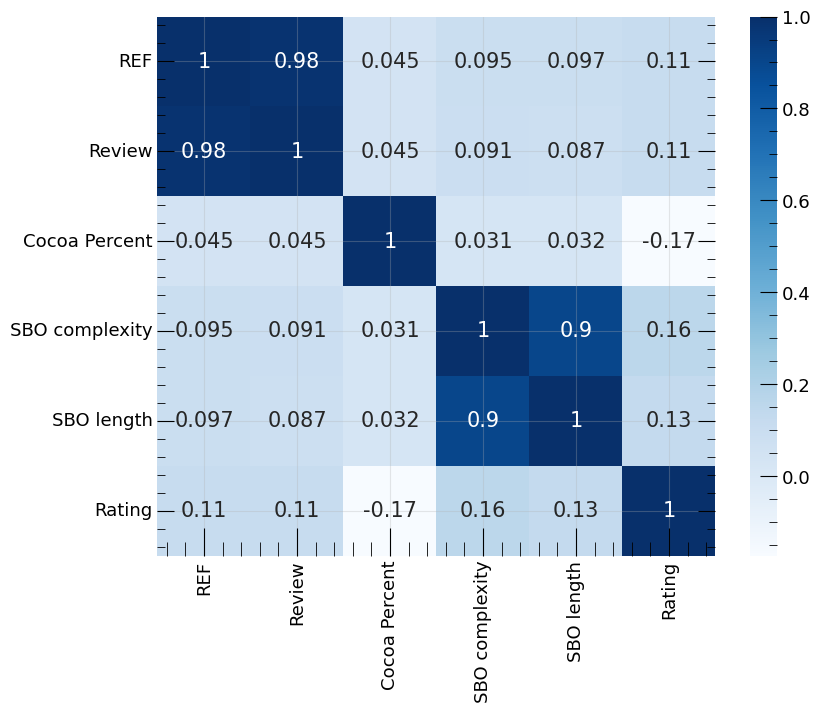

In [33]:
plt.figure(figsize = (9, 7))
plt.rcParams.update({
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
})

df_train_Rating = df_train_new.Rating
df_train_new.drop(['Rating'], axis=1, inplace=True)
df_train_new['Rating'] = df_train_Rating

sns.heatmap(df_train_new.corr(), annot=True, cmap="Blues")

plt.show()

Здесь мы видим, что некоторые переменные попарно скоррелированы друг с другом на уровне выше, чем 0.9:
* 'REF' и 'Review'
* 'SBO complexity' и 'SBO length'

Во второй паре отбросим ту переменную, которая имеет меньшую корреляцию с 'Rating', целевой переменной. Из первой пары исключим 'Review', так как 'REF' имеет несколько более очевидную связь с целевой переменной.

In [34]:
df_train_new = df_train_new.drop(['Review', 'SBO length'], axis=1)
df_test_new = df_test_new.drop(['Review', 'SBO length'], axis=1)

In [35]:
df_train = df_train.drop(['Review', 'SBO length'], axis=1)
df_test = df_test.drop(['Review', 'SBO length'], axis=1)

## 6.2 Categorical features correlation

Исследуем связь между категориальными признаками, используя V-меру Крамера.

In [37]:
import association_metrics as am

XC = df_train_new.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(XC)
cramersv.fit()

,Company,Specific Bean Origin,Company Location,Bean Type,Broad Bean Origin,Broad Company Location,Bean Origin World
Company,1.000000,0.771074,0.999638,0.621855,0.602729,0.998283,0.631676
Specific Bean Origin,0.771074,1.000000,0.811367,0.908351,0.985490,0.843555,0.994290
Company Location,0.999638,0.811367,1.000000,0.252452,0.388194,1.000000,0.365214
Bean Type,0.621855,0.908351,0.252452,1.000000,0.401308,0.321343,0.432985
Broad Bean Origin,0.602729,0.985490,0.388194,0.401308,1.000000,0.452780,1.000000
Broad Company Location,0.998283,0.843555,1.000000,0.321343,0.452780,1.000000,0.297693
Bean Origin World,0.631676,0.994290,0.365214,0.432985,1.000000,0.297693,1.000000


Мы видим, что нектоторые признаки имеют значение V-меры связи близкую к 1 (максимуму):
* Broad Company Location и Company
* Company Location и Company
* Broad Bean Origin и Bean Origin

Но пока не будем спешить отбрасывать часть их этих признаков. Они могут повысить качество модели, тренированной на данных с ними.

# 7 Models

На этом этапе мы будем строить модели регрессии для предсказания рейтинга шоколада. Будем использовать CatBooostRegressor. Эта библиотека сама кодирует категориальные признаки, переданные модели. В данных содержится множество категориальных признаков и кодирование их с применением стандартных техник не только отнимет много времени на разработку, но и может дать результат, худший, чем тот, который покажет CatBoost.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV, cross_val_score

from catboost import CatBoostRegressor

## 7.1 CatBoost with defaul hyperparameters

Сначала посмотрим, как покажет себя регрессор с гиперпараметрами по умолчанию

In [39]:
def train_cb_regressor(data_train: pd.DataFrame, tunning:bool=False, n_trials:int=10):
    X = data_train.drop('Rating', axis=1)
    y = data_train.Rating

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

    categorical_features_indices = np.where(X.dtypes == object)[0]
    
    model = CatBoostRegressor(cat_features=categorical_features_indices,
                              logging_level='Silent')
    
    # Optuna
    if tunning:
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2, step=0.001)
                #"min_child_samples": trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
            }

            estimator = CatBoostRegressor(**param,
                                          cat_features=categorical_features_indices,
                                          custom_metric='R2',
                                          verbose=False)

            estimator.fit(X_train, y_train)
            pred = estimator.predict(X_val)

            return mean_squared_error(y_val, pred, squared=False)
        
        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=n_trials, n_jobs=-1)
        #print(study.best_trial)
        print("Best params:", study.best_trial.params)
        model = CatBoostRegressor(**study.best_params,
                                 cat_features=categorical_features_indices,
                                 logging_level='Silent')
    
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
    model.fit(X_train, y_train,
             eval_set=(X_val, y_val))

    y_pred_val = model.predict(X_val)

    print("R2 scores")
    print(f"On validation sample = {round(r2_score(y_val, y_pred_val), 3)}")
    print(f"All CV scores = {', '.join(map(lambda x: str(round(x, 3)), cv_scores))}")
    print(f"Mean CV score = {round(cv_scores.mean(), 3)}")
    
    model_permutation_importance = permutation_importance(model,
                                                          X_val,
                                                          y_val,
                                                          scoring='r2',
                                                          n_repeats=20,
                                                          random_state=0,
                                                          n_jobs=-1)

    df_importance = pd.DataFrame({'Feature': model.feature_names_,
                                  'CatBoost Importance': model.feature_importances_,
                                  'Permutation Importance': model_permutation_importance.importances_mean,
                                  'Permutation Importance std': model_permutation_importance.importances_std})\
                                  .sort_values(by='CatBoost Importance', ascending=False)
    display(df_importance)
    return model

Ниже мы тренируем CatBoost с гиперпараметрам по умолчанию на данных с заполненными и незаполненными пропусками

In [40]:
# Пропуски заполнены
train_cb_regressor(df_train_new)

R2 scores
On validation sample = 0.162
All CV scores = 0.123, 0.215, 0.227
Mean CV score = 0.188


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,22.090936,0.166913,0.032002
3,Cocoa Percent,16.975121,0.098663,0.025402
2,REF,12.341331,0.028499,0.011918
5,Bean Type,9.875161,0.011758,0.008720
4,Company Location,9.384172,-0.008095,0.009695
6,Broad Bean Origin,8.850745,0.003921,0.006809
8,Bean Origin World,8.365662,0.001631,0.006352
7,Broad Company Location,5.818937,-0.004920,0.004214
9,SBO complexity,4.473043,0.030658,0.006768
1,Specific Bean Origin,1.824892,0.003643,0.003470


In [41]:
# В пропусках уникальное значение "Unknown"
train_cb_regressor(df_train)

R2 scores
On validation sample = 0.238
All CV scores = 0.105, 0.234, 0.241
Mean CV score = 0.193


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,18.540511,0.239727,0.030059
3,Cocoa Percent,16.420824,0.119255,0.020995
2,REF,13.971535,0.094680,0.022020
6,Broad Bean Origin,10.931403,0.025234,0.008380
5,Bean Type,9.471151,0.038030,0.015659
4,Company Location,7.539625,0.013629,0.006780
8,Bean Origin World,6.859504,-0.004471,0.005159
9,SBO complexity,6.057822,0.028881,0.010850
7,Broad Company Location,5.994164,0.007917,0.006173
1,Specific Bean Origin,4.213462,0.008395,0.007711


Как видно, результаты сильно зависят от разбиения выборки на тренировчную и тестовую часть. Но одно можно сказать наверняка: колонку "Specific Bean Origin" можно выкинуть. Также мы видим, что качество предсказаний (на валидационной части и cross validation) очень близко для данных с заполненными пропусками и с незаполненными

In [42]:
df_train = df_train.drop('Specific Bean Origin', axis=1)
df_test = df_test.drop('Specific Bean Origin', axis=1)
df_train_new = df_train_new.drop('Specific Bean Origin', axis=1)
df_test_new = df_test_new.drop('Specific Bean Origin', axis=1)

## 7.2 Hyperparameters tunning

Подберём гиперпараметры регрессора

In [61]:
model_cb1 = train_cb_regressor(df_train_new, True, 100)

[I 2023-08-12 11:23:33,633] A new study created in memory with name: no-name-f8c6541f-d2c9-4618-9107-5475471c7e1b
[I 2023-08-12 11:23:33,821] Trial 2 finished with value: 0.42583329282843824 and parameters: {'n_estimators': 188, 'max_depth': 1, 'learning_rate': 0.155}. Best is trial 2 with value: 0.42583329282843824.
[I 2023-08-12 11:23:33,854] Trial 10 finished with value: 0.42944705994613575 and parameters: {'n_estimators': 207, 'max_depth': 1, 'learning_rate': 0.045}. Best is trial 2 with value: 0.42583329282843824.
[I 2023-08-12 11:23:33,869] Trial 8 finished with value: 0.4194115275275393 and parameters: {'n_estimators': 46, 'max_depth': 5, 'learning_rate': 0.107}. Best is trial 8 with value: 0.4194115275275393.
[I 2023-08-12 11:23:33,874] Trial 13 finished with value: 0.4179301244910912 and parameters: {'n_estimators': 49, 'max_depth': 6, 'learning_rate': 0.128}. Best is trial 13 with value: 0.4179301244910912.
[I 2023-08-12 11:23:34,145] Trial 9 finished with value: 0.4232505778

[I 2023-08-12 11:23:45,933] Trial 21 finished with value: 0.43980866211382574 and parameters: {'n_estimators': 959, 'max_depth': 7, 'learning_rate': 0.199}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:47,168] Trial 27 finished with value: 0.43585192466991 and parameters: {'n_estimators': 482, 'max_depth': 10, 'learning_rate': 0.111}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:47,677] Trial 56 finished with value: 0.4253656087401817 and parameters: {'n_estimators': 97, 'max_depth': 7, 'learning_rate': 0.166}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:47,889] Trial 49 finished with value: 0.4432135250731865 and parameters: {'n_estimators': 553, 'max_depth': 7, 'learning_rate': 0.135}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:48,301] Trial 50 finished with value: 0.43479578585331047 and parameters: {'n_estimators': 569, 'max_depth': 7, 'learning_rate': 0.139}. Best is trial 44 with va

[I 2023-08-12 11:23:55,371] Trial 14 finished with value: 0.4371269608967406 and parameters: {'n_estimators': 392, 'max_depth': 9, 'learning_rate': 0.1}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:55,842] Trial 90 finished with value: 0.41597362539811994 and parameters: {'n_estimators': 70, 'max_depth': 6, 'learning_rate': 0.085}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:55,939] Trial 89 finished with value: 0.42516462213138356 and parameters: {'n_estimators': 108, 'max_depth': 6, 'learning_rate': 0.037000000000000005}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:55,951] Trial 91 finished with value: 0.42985835793821986 and parameters: {'n_estimators': 128, 'max_depth': 6, 'learning_rate': 0.023}. Best is trial 44 with value: 0.4108176150672813.
[I 2023-08-12 11:23:55,952] Trial 92 finished with value: 0.4118732870275296 and parameters: {'n_estimators': 128, 'max_depth': 6, 'learning_rate': 0.085}. Best is t

Best params: {'n_estimators': 111, 'max_depth': 6, 'learning_rate': 0.132}
R2 scores
On validation sample = 0.288
All CV scores = 0.129, 0.248, 0.275
Mean CV score = 0.217


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,24.053512,0.243671,0.037180
2,Cocoa Percent,18.161645,0.157706,0.038156
1,REF,15.359669,0.113443,0.018243
4,Bean Type,9.579782,0.020687,0.007829
3,Company Location,8.505967,0.016871,0.012316
8,SBO complexity,8.410915,0.024965,0.009984
7,Bean Origin World,5.801680,0.009751,0.003353
6,Broad Company Location,5.585312,0.008241,0.005079
5,Broad Bean Origin,4.541518,0.004163,0.005259


In [64]:
model_cb2 = train_cb_regressor(df_train, True, 100)

[I 2023-08-12 11:25:29,850] A new study created in memory with name: no-name-c095c74c-f583-4c6a-b3b7-bb253923d625
[I 2023-08-12 11:25:30,142] Trial 15 finished with value: 0.40847406013163784 and parameters: {'n_estimators': 42, 'max_depth': 6, 'learning_rate': 0.10200000000000001}. Best is trial 15 with value: 0.40847406013163784.
[I 2023-08-12 11:25:30,201] Trial 1 finished with value: 0.41078421394410086 and parameters: {'n_estimators': 457, 'max_depth': 1, 'learning_rate': 0.089}. Best is trial 15 with value: 0.40847406013163784.
[I 2023-08-12 11:25:30,312] Trial 7 finished with value: 0.40817651745996425 and parameters: {'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.109}. Best is trial 7 with value: 0.40817651745996425.
[I 2023-08-12 11:25:30,530] Trial 8 finished with value: 0.4131430561995459 and parameters: {'n_estimators': 535, 'max_depth': 2, 'learning_rate': 0.122}. Best is trial 7 with value: 0.40817651745996425.
[I 2023-08-12 11:25:30,566] Trial 6 finished with v

[I 2023-08-12 11:25:49,015] Trial 43 finished with value: 0.4107478653024347 and parameters: {'n_estimators': 351, 'max_depth': 10, 'learning_rate': 0.042}. Best is trial 36 with value: 0.40336618414712144.
[I 2023-08-12 11:25:49,106] Trial 25 finished with value: 0.4064934797137231 and parameters: {'n_estimators': 264, 'max_depth': 9, 'learning_rate': 0.05}. Best is trial 36 with value: 0.40336618414712144.
[I 2023-08-12 11:25:49,556] Trial 44 finished with value: 0.4092022895642974 and parameters: {'n_estimators': 373, 'max_depth': 10, 'learning_rate': 0.032}. Best is trial 36 with value: 0.40336618414712144.
[I 2023-08-12 11:25:50,506] Trial 55 finished with value: 0.40572976675946804 and parameters: {'n_estimators': 99, 'max_depth': 9, 'learning_rate': 0.064}. Best is trial 36 with value: 0.40336618414712144.
[I 2023-08-12 11:25:50,572] Trial 54 finished with value: 0.409212888844419 and parameters: {'n_estimators': 98, 'max_depth': 9, 'learning_rate': 0.197}. Best is trial 36 with

[I 2023-08-12 11:26:06,587] Trial 93 finished with value: 0.4058798677073318 and parameters: {'n_estimators': 137, 'max_depth': 7, 'learning_rate': 0.091}. Best is trial 82 with value: 0.40054338353971536.
[I 2023-08-12 11:26:06,643] Trial 48 finished with value: 0.40919259317205486 and parameters: {'n_estimators': 360, 'max_depth': 9, 'learning_rate': 0.067}. Best is trial 82 with value: 0.40054338353971536.
[I 2023-08-12 11:26:07,026] Trial 46 finished with value: 0.4093888960536759 and parameters: {'n_estimators': 374, 'max_depth': 9, 'learning_rate': 0.039}. Best is trial 82 with value: 0.40054338353971536.
[I 2023-08-12 11:26:07,542] Trial 91 finished with value: 0.4014465564936515 and parameters: {'n_estimators': 128, 'max_depth': 9, 'learning_rate': 0.089}. Best is trial 82 with value: 0.40054338353971536.
[I 2023-08-12 11:26:07,680] Trial 97 finished with value: 0.4031465151223726 and parameters: {'n_estimators': 77, 'max_depth': 8, 'learning_rate': 0.132}. Best is trial 82 wit

Best params: {'n_estimators': 137, 'max_depth': 8, 'learning_rate': 0.114}
R2 scores
On validation sample = 0.241
All CV scores = 0.069, 0.203, 0.27
Mean CV score = 0.181


,Feature,CatBoost Importance,Permutation Importance,Permutation Importance std
0,Company,20.370036,0.184607,0.026651
1,REF,13.735292,0.081599,0.023061
4,Bean Type,13.062287,0.061589,0.013334
2,Cocoa Percent,11.772287,0.103071,0.018439
3,Company Location,10.113379,0.036413,0.010409
5,Broad Bean Origin,9.793171,0.025152,0.011688
8,SBO complexity,7.643143,0.038259,0.012593
6,Broad Company Location,7.196338,0.012717,0.006744
7,Bean Origin World,6.314067,0.014972,0.005942


## 7.3 Make predictions with models

In [46]:
def make_prediction(model, data_train, data_test):
    X = data_train.drop('Rating', axis=1)
    y = data_train['Rating']
    model.fit(X, y)
    pred = model.predict(data_test)
    
    df_submission = data_test.copy()
    df_submission['id'] = np.arange(len(data_test))
    df_submission['Rating'] = pred
    df_submission = df_submission[['id','Rating']]
    return df_submission

# 8 Pipelines

Здесь мы напишем классы вместо наших функций предобработки, чтобы их можно было обернуть в sklearn Pipeline

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

## 8.1 Data preprocessing class

Весь процесс предобработки данных до замены пропусков

In [127]:
class DataPreprocessor(BaseEstimator, TransformerMixin):
    """
    Класс форматирует данные, чтобы подготовить их к работе.
    Этот класс можно в ключать в sklearn.Pipeline
    """
    def __init__(self):
        pass
        
    """Метод fit() этому классу не нужен, он ничего не делает"""
    def fit(self, X: pd.DataFrame, y: pd.Series=None):
        return self
    
    """Метод transform() преобразует данные"""
    def transform(self, X: pd.DataFrame, y: pd.Series=None) -> pd.DataFrame:
        X_ = X.copy()
        X_['Cocoa Percent'] = X_['Cocoa Percent'].apply(lambda x: float(x.strip('%')))
        X_ = X_.fillna("Unknown")
        X_['Broad Bean Origin'] = X_['Broad Bean Origin'].replace('\xa0', "Unknown")
        X_['Bean Type'] = X_['Bean Type'].replace('\xa0', "Unknown")
        X_.replace(
        {
            'Eucador': 'Ecuador',
            'Domincan Republic': 'Dominican Republic',
            'Niacragua': 'Nicaragua'
        },
        inplace=True)
        
        return X_

## 8.2 Feature engineering class

Добавление новых предикторов

In [115]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    """Класс для добавления новых признаков в данные
    Может быть включен в sklearn.Pipeline
    """
    BROAD_LOCATION = {'Europe': ['U.K.', 'Switzerland', 'France', 'Belgium', 'Spain', 'Italy',
                                  'Austria', 'Sweden', 'Ireland', 'Poland', 'Hungary', 'Germany',
                                  'Denmark', 'Lithuania', 'Scotland', 'Finland', 'Iceland',
                                  'Amsterdam', 'Wales', 'Netherlands', 'Portugal', 'Czech Republic'],
                       'North America': ['U.S.A.', 'Canada'],
                       'Africa': ['Madagascar', 'South Africa', 'Ghana', 'Sao Tome', 'Tanzania',
                                  'Indonesia', 'Congo', 'Liberia', 'Principe', 'Sao Tome & Principe',
                                  'Gabon', 'Ivory Coast', 'Uganda', 'Nigeria', 'West Africa'],
                       'Caribbean': ['Colombia', 'Venezuela', 'Honduras', 'Guatemala',
                                     'Domincan Republic', 'Grenada', 'Puerto Rico', 'Costa Rica',
                                     'St. Lucia', 'Nicaragua', 'Martinique', 'Niacragua', 'Cost Rica, Ven',
                                     'Trinidad', 'Panama', 'Jamaica', 'Haiti', 'Cuba', 'Venezuela, Ghana',
                                     'Ven.,Ecu.,Peru,Nic.', 'Tobago', 'Carribean(DR/Jam/Tri)',
                                     'Venezuela, Java', 'Ven, Bolivia, D.R.', 'Venezuela, Carribean',
                                     'Dominican Republic', 'Carribean'],
                       'Asia & Oceania': ['Japan', 'Vietnam', 'Philippines', 'Fiji', 'Australia',
                                          'South Korea', 'Israel', 'Singapore', 'India', 'Russia',
                                          'New Zealand', 'Papua New Guinea', 'Hawaii', 'Solomon Islands',
                                          'Sri Lanka', 'Malaysia', 'Samoa', 'Philippines', 'Togo',
                                          'Vanuatu'],
                       'South America': ['Ecuador', 'Brazil', 'Peru', 'Eucador', 'Argentina',
                                         'Chile', 'Mexico', 'Bolivia', 'Suriname', 'Peru, Dom. Rep',
                                         'Central and S. America', 'Colombia, Ecuador', 'Dom. Rep., Madagascar',
                                         'South America', 'Belize', 'El Salvador'],
                       'Mixed': ['Trinidad, Ecuador', 'South America, Africa', 'PNG, Vanuatu, Mad',
                                 'Mad., Java, PNG', 'Peru, Mad., Dom. Rep.', 'Indonesia, Ghana', 'Madagascar & Ecuador',
                                 'Venez,Africa,Brasil,Peru,Mex', 'DR, Ecuador, Peru', 'Dominican Rep., Bali',
                                 'Peru, Madagascar', 'Venezuela, Dom. Rep.', 'Peru, Ecuador, Venezuela',
                                 'Ven., Trinidad, Mad.', 'Ven., Indonesia, Ecuad.', 'Ghana, Domin. Rep',
                                 'Peru, Belize', 'Guat., D.R., Peru, Mad., PNG']
                       }
    
    
    def __init__(self):
        pass
    
    def location_in_list(self, location: str):
        for k, v in self.BROAD_LOCATION.items():
            if location in v:
                return k
        return 'Other'

    @staticmethod
    def length_bin(s: str, min_val:int=0, max_val:int=50, step:int=10) -> int:
        n = len(s)
        bins = np.arange(min_val, max_val+step, step)
        for i in range(bins.shape[0]):
            if n > bins[i] and n <= bins[i+1]:
                return i
        
    def fit(self, X: pd.DataFrame, y: pd.Series=None):
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.Series=None) -> pd.DataFrame:
        X_ = X.copy()
        # Broad Locations
        X_['Broad Company Location'] = X_['Company Location'].apply(lambda x: self.location_in_list(x))
        X_['Bean Origin World'] = X_['Broad Bean Origin'].apply(lambda x: self.location_in_list(x))
        X_['SBO complexity'] = X_['Specific Bean Origin'].apply(lambda x: x.count('.') + x.count(',') + x.count(' '))
        
        return X_

## 8.3 FeatureFixer class

Адаптируем функцию заполнения пропусков FeatureFixer для построения Pipilines. Также, исключим момент обучения его на тестовых данных (что, скорее всего ухудшит качество прогнозов).

In [116]:
optuna.logging.set_verbosity(optuna.logging.INFO)

In [117]:
class FeatureFixer(BaseEstimator, TransformerMixin):
    
    """
    column - признак, который мы будем прогнозировать ('Broad Bean Origin' или 'Bean Type')
    cols_to_drop - колонки, которые необходимо исключить при обуении модели, наприме, если в них есть пропуски
    n_top - число наиболее часто встречающихся значений для обучения
    n_trial - число итераций обучения для Optuna
    """
    def __init__(self, column:str, cols_to_drop:list, n_top:int, tunning:bool=False, n_trials:int=3, marker:str="Unknown", target:str='Rating'):
        self.column = column
        self.cols_to_drop = cols_to_drop
        self.n_top = n_top
        self.n_trials = n_trials
        self.marker = marker
        self.tunning = tunning
        self.target = target
        self.model = CatBoostClassifier()
        
    
    @staticmethod
    def label_accuracy(y_true: pd.Series, y_pred: np.ndarray):
        """Простая метрика для оценки качества модели"""
        df_pred = pd.DataFrame({'True values': y_true.values, 'Predicted values': y_pred[:, 0]})
        return (df_pred['True values'] == df_pred['Predicted values']).sum() / df_pred.shape[0]
        
        
    def hyperparameters_tunning(self, X:pd.DataFrame, y:pd.Series, categorical_features_indices: pd.Series) -> CatBoostClassifier:
        """Подбор гиперпараметров модели"""
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
        
        def objective(trial):
            param = {
                "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
                "max_depth": trial.suggest_int("max_depth", 1, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, step=0.001)
            }

            estimator = CatBoostClassifier(**param,
                                           cat_features=categorical_features_indices,
                                           verbose=False)

            estimator.fit(X_train, y_train)
            pred = estimator.predict(X_val)

            return self.label_accuracy(y_val, pred)

        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=self.n_trials, n_jobs=-1)
        #print(study.best_trial)
        
        self.best_params = study.best_params
        best_model = CatBoostClassifier(**study.best_params,
                                       cat_features=categorical_features_indices,
                                       logging_level='Silent')
        
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_val)
        
        print(f"Best accuracy = {self.label_accuracy(y_val, y_pred)}")
        return best_model
        
        
    """Fit imputer (train dataframe only)"""
    def fit(self, X: pd.DataFrame, y=None):
        # part of data to train on
        X_train = X[(X[self.column] != self.marker)].drop(self.cols_to_drop+[self.column], axis=1)
        y_train = X[(X[self.column] != self.marker)][self.column]
        
        # Most probable bean origins
        top_values = y_train.value_counts()[:self.n_top].index
        top_values_mask = y_train.apply(lambda x: x in top_values)

        # train on top n values of column only
        X_train = X_train[top_values_mask]
        y_train = y_train[top_values_mask]
        
        categorical_features_indices = np.where(X_train.dtypes == object)[0]
        self.model = CatBoostClassifier(cat_features=categorical_features_indices, verbose=False)
        if self.tunning:
            self.model = self.hyperparameters_tunning(X_train, y_train, categorical_features_indices)
        self.model.fit(X_train, y_train)
        self.df_importance = pd.DataFrame({'Feature': self.model.feature_names_,
                                           'CatBoost Importance': self.model.feature_importances_})\
                                           .sort_values(by='CatBoost Importance', ascending=False)
        
        return self
        
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_ = X.copy()
        # part of data to apply to
        if self.target in X.columns:
            X_test = X_[(X_[self.column] == self.marker)].drop(self.cols_to_drop+[self.column], axis=1)
        else:
            X_test = X_[(X_[self.column] == self.marker)].drop(self.cols_to_drop+[self.column], axis=1)
        # prediction for column
        column_pred = self.model.predict(X_test)
        X_.loc[(X_[self.column] == self.marker), self.column] = column_pred
        return X_

    
    def fit_transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        self.fit(X, y)
        return self.transform(X)
        
        
    def predict(self, X_test: pd.DataFrame) -> np.ndarray:
        y_pred = self.model.predict(X_test)
        return y_pred[:, 0]
    

In [118]:
df_train = pd.read_csv('data_intial/chocolate_train.csv')
df_test = pd.read_csv('data_intial/chocolate_test_new.csv')

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']

X_test = df_test

In [120]:
pipeline = Pipeline(steps=[
    ('data_preprocessor', DataPreprocessor()),
    ('feature_adder', FeatureEngineering()),
    ('feature_fixer_1', FeatureFixer('Broad Bean Origin', ['Bean Type'], n_top=11)),
    ('feature_fixer_2', FeatureFixer('Bean Type', [], n_top=7)),
    ])

In [121]:
pipeline.fit_transform(X_train, y_train)

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin,Broad Company Location,Bean Origin World,SBO complexity
0,Willie's Cacao,Rio Caribe,457,2009,72.0,U.K.,Trinitario,Venezuela,Europe,Caribbean,1
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72.0,Switzerland,Criollo,Venezuela,Europe,Caribbean,8
2,Dark Forest,Tanzania,1554,2015,70.0,U.S.A.,Trinitario,Tanzania,North America,Africa,0
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72.0,U.S.A.,Trinitario,Dominican Republic,North America,Caribbean,0
4,Pralus,"Java, Indonesie",32,2006,75.0,France,Criollo,Indonesia,Europe,Africa,2
...,...,...,...,...,...,...,...,...,...,...,...
1250,Artisan du Chocolat,Madagascar,363,2009,80.0,U.K.,"Criollo, Trinitario",Madagascar,Europe,Africa,0
1251,Marana,Cusco,1884,2016,70.0,Peru,Criollo,Peru,South America,South America,0
1252,Arete,Nacional,1534,2015,68.0,U.S.A.,Forastero (Nacional),Peru,North America,South America,0
1253,Fresco,"Conacado, #212, LR, SC",642,2011,72.0,U.S.A.,Trinitario,Dominican Republic,North America,Caribbean,6


In [123]:
X_test = pipeline.transform(X_test)

# 9 Stacking

## 9.1 Stacking from SKLearn

Разбиваем тренировочные данные на две части

In [ ]:
RANDOM_STATE = 20

In [130]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [129]:
estimators = [("CatBoost imputer", model_cb1), ("CatBoost initial", model_cb2)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking_model

StackingRegressor(estimators=[('CatBoost imputer',
                               <catboost.core.CatBoostRegressor object at 0x7f8a56f23ad0>),
                              ('CatBoost initial',
                               <catboost.core.CatBoostRegressor object at 0x7f8a57be4090>)],
                  final_estimator=RandomForestRegressor())

## 8.1 Stacking pipeline

In [98]:
train_init_sample1 = df_train.sample(900, random_state=20).sort_index()
train_init_sample2 = df_train.iloc[[i for i in df_train.index if not np.isin(i, train_init_sample1.index)]]

train_new_sample1 = df_train_new.sample(900, random_state=20).sort_index()
train_new_sample2 = df_train_new.iloc[[i for i in df_train_new.index if not np.isin(i, train_new_sample1.index)]]

model_cb1.fit(train_new_sample1.drop('Rating', axis=1), train_new_sample1['Rating'])
model_cb2.fit(train_init_sample1.drop('Rating', axis=1), train_init_sample1['Rating'])

model_cb1_pred = model_cb1.predict(train_new_sample2.drop('Rating', axis=1))
model_cb2_pred = model_cb2.predict(train_init_sample2.drop('Rating', axis=1))

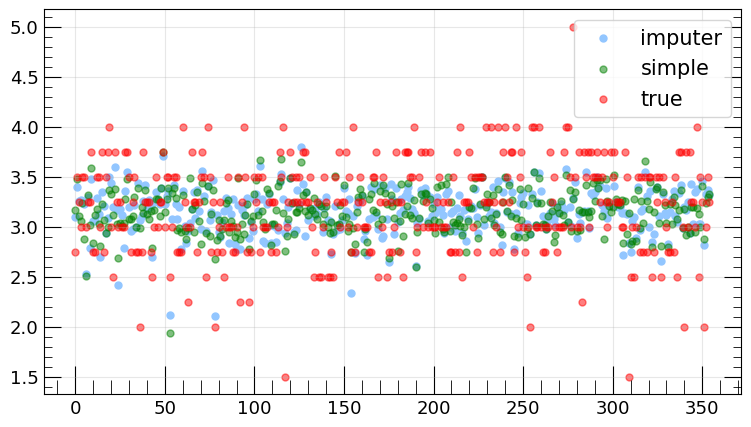

In [119]:
plt.scatter(np.arange(len(model_cb1_pred)), model_cb1_pred, label="imputer")
plt.scatter(np.arange(len(model_cb2_pred)), model_cb2_pred, label="simple", c='green', alpha=0.5)
plt.scatter(np.arange(len(train_new_sample2['Rating'])), train_new_sample2['Rating'], label="true", c='red', alpha=0.5)
plt.legend()

In [ ]:
RANDOM_STATE = 23

X_train_init = df_train.drop('Rating', axis=1)
y_train_init = df_train['Rating']

X_train_new = df_train.drop('Rating', axis=1)
y_train_new = df_train['Rating']

X_init_train1, X_init_train2, y_init_train1, y_init_train2 = train_test_split(
    X_train_init, y_train_init, test_size=0.3, random_state=RANDOM_STATE)

X_new_train1, X_new_train2, y_new_train1, y_new_train2 = train_test_split(
    X_train_new, y_train_new, test_size=0.3, random_state=RANDOM_STATE)

In [ ]:
model_cb1.fit(X_new_train1, y_new_train1)
model_cb2.fit(X_init_train1, y_init_train1)

In [ ]:
pred_cb1 = model_cb1.predict(X_new_train2)
pred_cb2 = model_cb2.predict(X_init_train2)

In [ ]:
df_meta = pd.DataFrame({'model_new': pred_cb1, 'model_init': pred_cb2, 'y_true': y_new_train2.values})
df_meta.head()

In [ ]:
X_meta = df_meta.drop('y_true', axis=1)
y_meta = df_meta['y_true']

## Linear

In [ ]:
from sklearn.linear_model import LinearRegression

linear_meta = LinearRegression()
linear_meta.fit(X_meta, y_meta)

df_coeff = pd.DataFrame({'Model': linear_meta.feature_names_in_,
                        'Coeff': linear_meta.coef_})

y_pred = linear_meta.predict(X_meta)
print(f"R2 score = {r2_score(y_meta, y_pred)}")

df_coeff = pd.concat([df_coeff, pd.DataFrame({'Model': 'Intercept', 'Coeff': linear_meta.intercept_}, index=[2])])
df_coeff

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tree_meta = DecisionTreeRegressor()

# parameters of model to optimise
parameters = {'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
              'max_depth': range(1, 4),
              'min_samples_leaf': np.arange(1, 4),
              'min_samples_split': np.arange(1, 4)
              }

search = GridSearchCV(tree_meta, parameters, cv=3)
search.fit(X_meta, y_meta)

print(search.best_params_)
print(search.best_score_)

In [ ]:
tree_meta = search.best_estimator_
tree_meta.fit(X_meta, y_meta)

y_pred = tree_meta.predict(X_meta)
print(f"R2 score = {r2_score(y_meta, y_pred)}")

In [ ]:
plot_tree(tree_meta)
plt.show()

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_meta = RandomForestRegressor()

parameters = {'n_estimators': np.arange(1, 20),
              'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
              'max_depth': range(1, 4),
              'min_samples_leaf': np.arange(1, 4),
              'min_samples_split': np.arange(1, 4)
             }

search = GridSearchCV(forest_meta, parameters, cv=3, n_jobs=-1)
search.fit(X_meta, y_meta)

print(search.best_params_)
print(search.best_score_)

In [123]:
forest_meta = search.best_estimator_
forest_meta.fit(X_meta, y_meta)

y_pred = forest_meta.predict(X_meta)
print(f"R2 score = {r2_score(y_meta, y_pred)}")

NameError: name 'search' is not defined

# 9 Make predictions

In [ ]:
X_new = df_train_new.drop('Rating', axis=1)
y_new = df_train_new['Rating']

X_init = df_train.drop('Rating', axis=1)
y_init = df_train['Rating']

model_cb1.fit(X_new, y_new)
model_cb2.fit(X_init, y_init)

In [ ]:
pred_new = model_cb1.predict(df_test_new)
print(df_test.shape)
pred_new[:10]

In [ ]:
pred_init = model_cb2.predict(df_test)
print(df_test.shape)
pred_init[:10]

In [ ]:
df_meta_test = pd.DataFrame({'model_new': pred_new, 'model_init': pred_init})
print(df_meta_test.shape)
df_meta_test.head()

In [ ]:
y_pred_test = forest_meta.predict(df_meta_test)
y_pred_test[:10]

In [ ]:
# Simple mean
df_submission = df_test.copy()
df_submission['id'] = np.arange(len(df_test))
df_submission['Rating'] = y_pred_test
df_submission = df_submission[['id','Rating']]
df_submission.to_csv("Stacking_forest_v1.csv", index=False)